# Student Performance Classification
In this project, I want to be able to predict a student's grade based on their age, ethnicity and their weekly study time.

Most of the process in this project is data analysis.

In [102]:
import pandas as pd

In [103]:
df = pd.read_csv('Student_performance_data _.csv')

In [104]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


# Data Cleaning

## Null Values

In [105]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [106]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

The StudentID column is of no use so I'm going to drop it

In [107]:
df = df.drop('StudentID', axis=1)

In [108]:
df['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

Our target variable has already been converted to a numeric value.

However it's worth noting that the GradeClass categorical value can be understood from the table below: 

0: 'A'

1: 'B'

2: 'C'

3: 'D'

4: 'F' 

From this data we can see that in this school for more than 50% of the students, their grades lie at F.

We can also calculate this using statistical methods.


In [109]:
df['GradeClass'].quantile(0.5)

4.0

Let us see the effect of various attributes on the GradeClass

In [110]:
df.groupby('GradeClass')[['StudyTimeWeekly', 'Absences', 'GPA']].mean()

,StudyTimeWeekly,Absences,GPA
GradeClass,,,
0.0,11.854926,5.747664,3.102942
1.0,11.122335,5.312268,3.001673
2.0,10.106404,7.250639,2.659742
3.0,9.757963,11.427536,2.215545
4.0,9.184822,20.786953,1.208041


On average, students with more study time performed better than students with less study time.

Students with less absences performed better than students with more absences.


Here we can conclude that study time and absences does have an impact on the overall grade class.

<Axes: title={'center': 'Average Weekly Study Time and Absences by Grade Class'}, xlabel='GradeClass'>

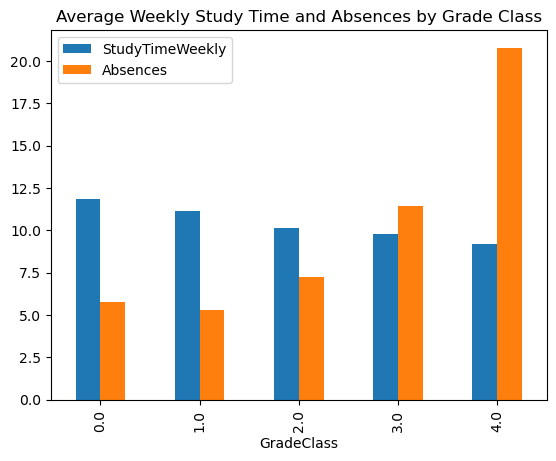

In [111]:
df.groupby("GradeClass")[["StudyTimeWeekly", "Absences"]].mean().plot(
    kind="bar", title="Average Weekly Study Time and Absences by Grade Class"
)

Most categorical columns have been label encoded, however this might not be the best solution for our machine learning model.

Here are the columns that have been encoded: Gender, Ethnicity, ParentalEducation, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering

<Axes: title={'center': 'Ethnicity '}, ylabel='Ethnicity'>

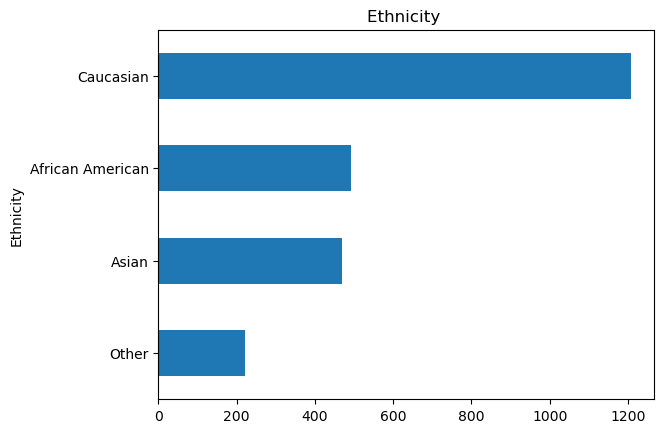

In [112]:
df["Ethnicity"].map(
    {
        0: "Caucasian",
        1: "African American",
        2: "Asian",
        3: "Other",
    }
).value_counts().sort_values().plot(kind="barh", title="Ethnicity ")

In [113]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [114]:
df.groupby("GradeClass")["Ethnicity"].value_counts().index.get_level_values(0)

Index([0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0,
       3.0, 3.0, 4.0, 4.0, 4.0, 4.0],
      dtype='float64', name='GradeClass')

In [115]:
df["Ethnicity"].map(
    {
        0: "Caucasian",
        1: "African American",
        2: "Asian",
        3: "Other",
    }
)

0              Caucasian
1              Caucasian
2                  Asian
3              Caucasian
4              Caucasian
              ...       
2387           Caucasian
2388           Caucasian
2389           Caucasian
2390    African American
2391           Caucasian
Name: Ethnicity, Length: 2392, dtype: object

In [116]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


<Axes: title={'center': 'Ethnicity frequency by Grade'}, xlabel='GradeClass'>

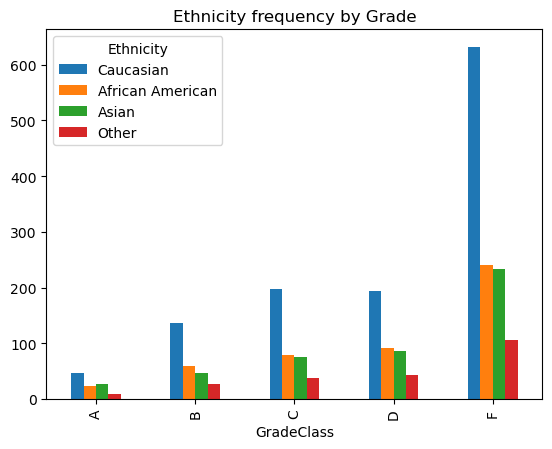

In [117]:
df.groupby("GradeClass")["Ethnicity"].value_counts().unstack().rename(
    columns={
        0: "Caucasian",
        1: "African American",
        2: "Asian",
        3: "Other",
    }, index={0:'A', 1:'B', 2:'C', 3:'D', 4:'F'}
).plot(kind='bar', title='Ethnicity frequency by Grade')

From this plot we can see that the count frequency for each ethnicity gets higher as the grade's credibility lower.

This can be understood as 75% of these student's grade lie at F.

We can use the percentage of the total population of each ethnicity rather than the count frequency to see which ethnicity passed more or failed more.

In [118]:
ethnicity_frequency_by_grade = df.groupby("GradeClass")["Ethnicity"].value_counts().unstack().rename(
    columns={
        0: "Caucasian",
        1: "African American",
        2: "Asian",
        3: "Other",
    },
    index={0: "A", 1: "B", 2: "C", 3: "D", 4: "F"},
)

In [119]:
ethnicity_frequency_by_grade.loc["Sum"] = ethnicity_frequency_by_grade.sum().values

In [120]:
ethnicity_frequency_by_grade

Ethnicity,Caucasian,African American,Asian,Other
GradeClass,,,,
A,47,24,27,9
B,136,59,47,27
C,198,79,76,38
D,194,91,86,43
F,632,240,234,105
Sum,1207,493,470,222


In [121]:
ethnicity_frequency_by_grade = (
    ethnicity_frequency_by_grade / ethnicity_frequency_by_grade.loc["Sum"]
).drop('Sum')

In [122]:
ethnicity_frequency_by_grade

Ethnicity,Caucasian,African American,Asian,Other
GradeClass,,,,
A,0.038940,0.048682,0.057447,0.040541
B,0.112676,0.119675,0.100000,0.121622
C,0.164043,0.160243,0.161702,0.171171
D,0.160729,0.184584,0.182979,0.193694
F,0.523612,0.486815,0.497872,0.472973


<Axes: title={'center': 'Ethnicity frequency by Grade'}, xlabel='GradeClass'>

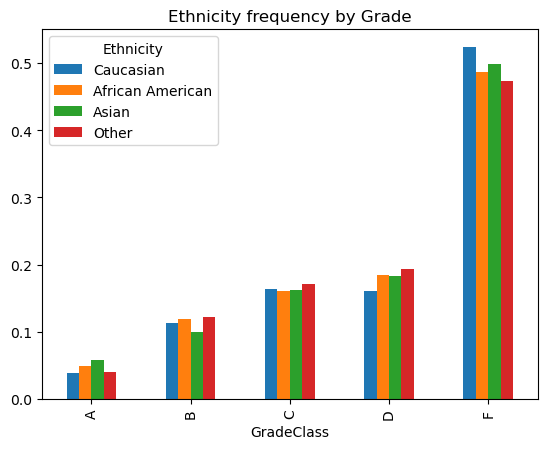

In [123]:
ethnicity_frequency_by_grade.plot(kind="bar", title="Ethnicity frequency by Grade")

For grades with a higher credibility the Asians performed well.

More than 50% of Caucasians had an F, which is the most for any other race.

<Axes: title={'center': 'Gender frequency by Grade'}, xlabel='GradeClass'>

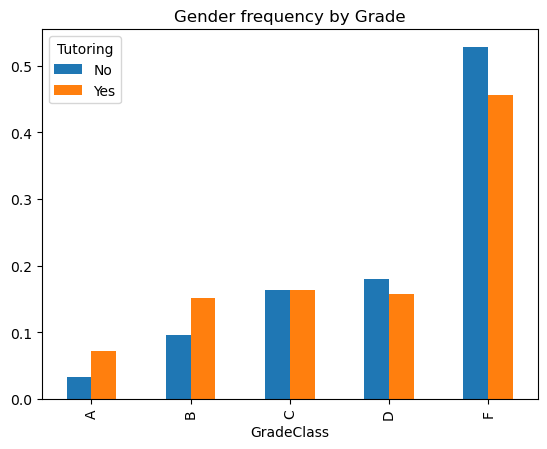

In [124]:
gender_frequency_by_grade = (
    df.groupby("GradeClass")["Tutoring"]
    .value_counts()
    .unstack()
    .rename(
        columns={
            0: "No",
            1: "Yes",
        },
        index={0: "A", 1: "B", 2: "C", 3: "D", 4: "F"},
    )
)


gender_frequency_by_grade.loc["Sum"] = gender_frequency_by_grade.sum().values
gender_frequency_by_grade = (
    gender_frequency_by_grade / gender_frequency_by_grade.loc["Sum"]
).drop("Sum")
gender_frequency_by_grade.plot(kind="bar", title="Gender frequency by Grade")

In [125]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


Going in detail for every attribute seems tiresome and boring, rather I'm going to use KMEANS to segment these students.  Note that I won't be using any of the encoded categorical columns.

In [126]:
df_kmeans = df[['StudyTimeWeekly', 'Absences']]

In [127]:
df_kmeans

,StudyTimeWeekly,Absences
0,19.833723,7
1,15.408756,0
2,4.210570,26
3,10.028829,14
4,4.672495,17
...,...,...
2387,10.680555,2
2388,7.583217,4
2389,6.805500,20
2390,12.416653,17


In [128]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [129]:
study_time_scaler = StandardScaler()
absences_scaler = StandardScaler()

In [130]:
df_kmeans = df_kmeans.assign(
    StudyTimeWeeklyScaled=study_time_scaler.fit_transform(
        df_kmeans[["StudyTimeWeekly"]]
    ),
    AbsencesScaled=absences_scaler.fit_transform(df_kmeans[["Absences"]]),
)

In [131]:
df_kmeans

,StudyTimeWeekly,Absences,StudyTimeWeeklyScaled,AbsencesScaled
0,19.833723,7,1.780336,-0.890822
1,15.408756,0,0.997376,-1.717694
2,4.210570,26,-0.984045,1.353542
3,10.028829,14,0.045445,-0.063951
4,4.672495,17,-0.902311,0.290422
...,...,...,...,...
2387,10.680555,2,0.160762,-1.481445
2388,7.583217,4,-0.387285,-1.245196
2389,6.805500,20,-0.524895,0.644796
2390,12.416653,17,0.467950,0.290422


In [132]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [133]:
kmeans.fit(df_kmeans[["StudyTimeWeeklyScaled", "Absences"]])

KMeans(n_clusters=5, random_state=42)

In [134]:
df_kmeans["Cluster"] = kmeans.predict(
    df_kmeans[["StudyTimeWeeklyScaled", "Absences"]]
)

<Axes: title={'center': 'Students Cluster Information'}, xlabel='Cluster'>

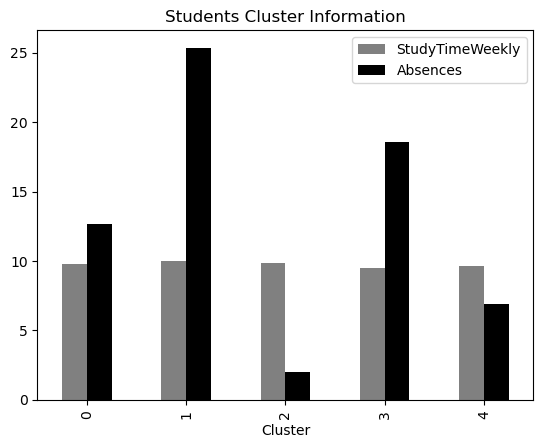

In [135]:
df_kmeans.groupby("Cluster")[["StudyTimeWeekly", "Absences"]].mean().plot(kind='bar', color=['gray', 'black'], title='Students Cluster Information'
)

Let's summarise the clusters that have been produced:

Cluster 0: average study time, moderate absences

Cluster 1: average study time, absent a lot

Cluster 2: average study time, few absences

Cluster 3: average study time, frequent absences

Cluster 4: average study time, few to mederate absences

# Classifying Student Grade

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [137]:
lr = LogisticRegression()

In [138]:
X = df.drop(['GPA', 'GradeClass'], axis=1)
y = df['GradeClass']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [140]:
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
lr.score(X_test, y_test)

0.7190635451505016

In [142]:
import pickle

I will now save this model using pickle.

I'm saving this model so that I can embed it into a web application (fastapi).  I will post the fastapi code on my Github soon...

In [143]:
with open('model.pkl', 'wb') as f:
    pickle.dump(lr, f)